<a href="https://colab.research.google.com/github/chriosch/CEINN-2025/blob/main/analisis_encuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la encuesta — «La Brecha Temporal de la Orientación Docente en el Uso de la IA»

Este cuaderno analiza y genera las tablas y gráficas descritas en el artículo usando como fuente el archivo CSV **`/content/Encuesta CEINN 2025.csv`** que acompañó la ponencia.

In [ ]:
# 1) Imports básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import shorten

sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
pd.set_option('display.max_colwidth', 200)

In [ ]:
# 2) Cargar datos
path = '/content/Encuesta CEINN 2025.csv'
df = pd.read_csv(path, encoding='utf-8', low_memory=False)
print('Dimensiones del dataset:', df.shape)
display(df.head())

Dimensiones del dataset: (63, 15)


,Timestamp,1. ¿En qué cuatrimestre te encuentras actualmente?,2. ¿Cuál es tu promedio general actual?,3. ¿Has utilizado alguna herramienta de inteligencia artificial (IA) en tus tareas escolares?,4. ¿Con qué frecuencia usas IA para tus actividades académicas?,5. ¿Qué herramientas de IA has utilizado? (Selecciona todas las que apliquen) \n,6. ¿En qué asignaturas usas más la IA? (Selecciona hasta 3) \n,7. ¿Para qué fines utilizas la IA? (Selecciona todas las que apliquen) \n,8. ¿Crees que usar IA para generar código constituye plagio si se entiende y se modifica la solución? \n,9. ¿Has recibido orientación de tus profesores sobre el uso ético y responsable de la IA? \n,10. ¿Qué opinas sobre la prohibición de usar IA en exámenes o tareas evaluadas? \n,11. ¿Te sientes más productivo al usar IA?,12. ¿Confías plenamente en las respuestas que te da la IA?,"13. ¿Qué te gustaría que los profesores o la institución hicieran respecto al uso de la inteligencia artificial en clase?\n(Respuesta abierta, hasta 150 palabras)","14. ¿Tienes alguna experiencia positiva o negativa que quieras compartir sobre el uso de IA en tus estudios?\n(Respuesta abierta, hasta 150 palabras)"
0,2025/09/04 8:20:37 am GMT-6,Primer ciclo de formación (1-3 cuatrimestre),De 9.0 a 10.0,Sí,Ocasionalmente,ChatGPT (OpenAI),Redacción de Informes Técnicos,Explicar conceptos complejos;Traducir o redactar textos técnicos,"No, si se entiende y se adapta, no es plagio","No, nunca",Debería permitirse con reglas claras,"Sí, mucho más","En parte, luego las verifico",Pues estaría bastante bien que la permitieran pero pues más bien para darte una idea de que tienes que hacer por qué a veces yo busco explicaciones con ella porque no termino de entender del todo ...,Pues una Positiva que si nos ayudó a alumnos que la usábamos como se debía y la negativa es que muchos de mis compañeros de preparatoria están batallando en la uni porque todo lo hacian con la IA
1,2025/09/04 8:20:40 am GMT-6,Primer ciclo de formación (1-3 cuatrimestre),De 9.0 a 10.0,Sí,Varias veces por semana,ChatGPT (OpenAI);Gemini (Google);Otra,"Ciencias Básicas (Matemáticas, Física);Otra",Explicar conceptos complejos;Resolver ejercicios o problemas,"No, si se entiende y se adapta, no es plagio","No, nunca",Debería permitirse con reglas claras,"Sí, un poco más","No, siempre las reviso y modifico",Que la permitieran cuando se trata de realizar trabajos que son difíciles de hacer sin preparación previa.\nEn momentos de exámen debería quedar prohibida para promover la honestidad al momento de...,"Es regular.\nLa IA es una herramienta de asistencia personal, es muy útil, pero no debemos verlo como una solución a todos nuestros problemas. Siempre tenemos que usarlo con responsabilidad y no c..."
2,2025/09/04 8:21:57 am GMT-6,Primer ciclo de formación (1-3 cuatrimestre),Menos de 8.0,Sí,Varias veces por semana,ChatGPT (OpenAI),Desarrollo de Aplicaciones Web/Móviles,Depurar o corregir errores en código,"No, si se entiende y se adapta, no es plagio","No, nunca","Es desactualizada, la IA ya forma parte del trabajo real de un ingeniero","Sí, un poco más","En parte, luego las verifico",Que los permitiera utilizar la IA para algunas actividades o investigaciones,Que fue una herramienta que me ayudó a entender código de programación mejor
3,2025/09/04 8:21:59 am GMT-6,Primer ciclo de formación (1-3 cuatrimestre),De 8.0 a 8.9,Sí,Ocasionalmente,ChatGPT (OpenAI),Desarrollo de Aplicaciones Web/Móviles,Depurar o corregir errores en código,Depende del contexto,"Sí, en alguna ocasión",No tengo opinión formada,"No, me distrae","No, siempre las reviso y modifico","Pues usar la cuando la necesitamos y que no sea para todo, a mi gusto la verdad casi no uso IA.","La IA debería existir pero con ciertas reglas, porque hoy en día la gente y más que todos los docentes no quieren batallar y usan la IA depende de eso en pocas palabras esta mal."
4,2025/09/04 8:24:19 am GMT-6,Primer ciclo de formación (1-3 cuatrimestre),De 8.0 a 8.9,Sí,Ocasionalment

## 3) Renombrar columnas clave

In [ ]:
# Mapear columnas largas a nombres cortos
col_map = {
    df.columns[1]: 'ciclo',
    df.columns[2]: 'promedio',
    df.columns[3]: 'uso_ia_si_no',
    df.columns[4]: 'frecuencia_uso',
    df.columns[5]: 'herramientas',
    df.columns[6]: 'asignaturas',
    df.columns[7]: 'fines_uso',
    df.columns[8]: 'percepcion_plagio',
    df.columns[9]: 'orientacion_docente',
    df.columns[10]: 'opinion_prohibicion',
    df.columns[11]: 'mas_productivo',
    df.columns[12]: 'respuesta_abierta_1',
    df.columns[13]: 'experiencias_abiertas'
}

existing_map = {k: v for k, v in col_map.items() if k in df.columns}
df = df.rename(columns=existing_map)
df.rename(columns=lambda c: c.strip(), inplace=True)
display(df.columns.tolist())

['Timestamp',
 'ciclo',
 'promedio',
 'uso_ia_si_no',
 'frecuencia_uso',
 'herramientas',
 'asignaturas',
 'fines_uso',
 'percepcion_plagio',
 'orientacion_docente',
 'opinion_prohibicion',
 'mas_productivo',
 'respuesta_abierta_1',
 'experiencias_abiertas',
 '14. ¿Tienes alguna experiencia positiva o negativa que quieras compartir sobre el uso de IA en tus estudios?\n(Respuesta abierta, hasta 150 palabras)']

# Tabla 1 — Frecuencia de orientación docente sobre IA por ciclo académico

In [ ]:
tabla1 = (df.groupby(['ciclo', 'orientacion_docente']).size().unstack(fill_value=0))
tabla1 = tabla1.reindex(index=[
    'Primer ciclo de formación (1-3 cuatrimestre)',
    'Segundo ciclo de formación (4-6 cuatrimestre)',
    'Tercer ciclo de formación (7-9 cuatrimestre)'
]).fillna(0)
tabla1_total = tabla1.copy()
tabla1_total.loc['Total'] = tabla1_total.sum()
display(tabla1_total)
tabla1_total.to_csv('/content/tabla1_orientacion_por_ciclo.csv')

orientacion_docente,No sé si es necesario,"No, nunca","Sí, con frecuencia","Sí, en alguna ocasión"
ciclo,,,,
Primer ciclo de formación (1-3 cuatrimestre),2,4,0,2
Segundo ciclo de formación (4-6 cuatrimestre),2,7,1,21
Tercer ciclo de formación (7-9 cuatrimestre),1,2,10,11
Total,5,13,11,34


## Gráfica 1 — Percepción ética sobre generar código con IA

,percepcion,conteo,porcentaje
0,"No, si se entiende y se adapta, no es plagio",45,71.428571
1,Depende del contexto,14,22.222222
2,No lo sé,2,3.174603
3,"Sí, siempre es plagio",2,3.174603


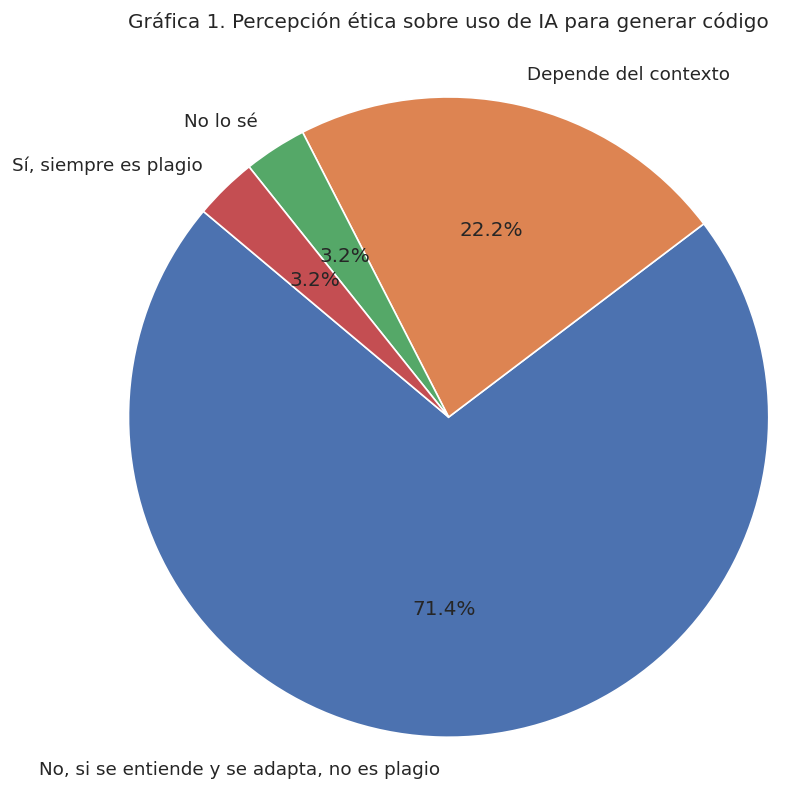

In [ ]:
g1 = df['percepcion_plagio'].value_counts().rename_axis('percepcion').reset_index(name='conteo')
g1['porcentaje'] = 100 * g1['conteo'] / g1['conteo'].sum()
display(g1)
plt.figure(figsize=(7,7))
plt.pie(g1['conteo'], labels=g1['percepcion'], autopct='%1.1f%%', startangle=140)
plt.title('Gráfica 1. Percepción ética sobre uso de IA para generar código')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig('/content/grafica1_percepcion_plagio.png')
plt.show()

## Gráfica 2 — Distribución de percepción ética

,Categoría,Conteo,Porcentaje (%)
0,Se entiende y se adapta (no es plagio),45,71.428571
1,Depende del contexto,14,22.222222
2,Siempre es plagio,2,3.174603
3,No lo sé,2,3.174603
4,"Menciones de ""aprender"" o ""ayudar"" (texto abie...",9,14.285714


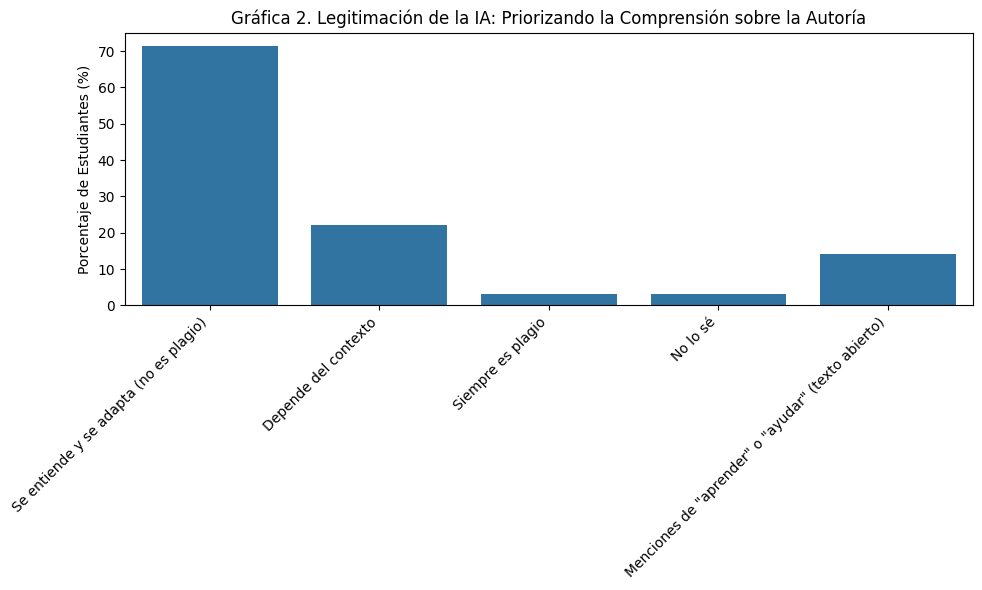

In [37]:
# Analyze the 'percepcion_plagio' and 'experiencias_abiertas' columns
# to show how students legitimize AI for learning, prioritizing understanding over authorship.

# 1. Analyze 'percepcion_plagio' and include relevant insights from 'experiencias_abiertas'
# Focus on responses that indicate understanding or adaptation as key to not being plagio.
# Also, consider responses mentioning 'aprender' (learn) or 'ayud' (help) from open-ended questions.

# Filter responses related to understanding and adaptation for non-plagio
understanding_responses = df[df['percepcion_plagio'].str.contains('No, si se entiende y se adapta', na=False)].shape[0]
depends_context_responses = df[df['percepcion_plagio'].str.contains('Depende del contexto', na=False)].shape[0]
always_plagio_responses = df[df['percepcion_plagio'].str.contains('Sí, siempre es plagio', na=False)].shape[0]
dont_know_responses = df[df['percepcion_plagio'].str.contains('No lo sé', na=False)].shape[0]

# Analyze open-ended responses for keywords related to learning and help
learn_help_responses = df['experiencias_abiertas'].astype(str).str.lower().str.contains('aprender|ayud').sum()

# Create a DataFrame for the table
data = {'Categoría': ['Se entiende y se adapta (no es plagio)', 'Depende del contexto', 'Siempre es plagio', 'No lo sé', 'Menciones de "aprender" o "ayudar" (texto abierto)'],
        'Conteo': [understanding_responses, depends_context_responses, always_plagio_responses, dont_know_responses, learn_help_responses]}
legitimacion_df = pd.DataFrame(data)

# Calculate percentages
legitimacion_df['Porcentaje (%)'] = 100 * legitimacion_df['Conteo'] / df.shape[0]

display(legitimacion_df)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Categoría', y='Porcentaje (%)', data=legitimacion_df)
plt.ylabel('Porcentaje de Estudiantes (%)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/grafica2_legitimacion_ia.png')
plt.show()

## Gráfica 3 — Opinión sobre prohibición de IA en evaluaciones por ciclo

opinion_prohibicion,Reglas Claras,Es Desactualizada,Necesaria Honestidad,Sin Opinión
ciclo,,,,
Primer ciclo de formación (1-3 cuatrimestre),37.5,12.5,25.0,25.0
Segundo ciclo de formación (4-6 cuatrimestre),38.7,19.4,41.9,0.0
Tercer ciclo de formación (7-9 cuatrimestre),33.3,37.5,16.7,12.5


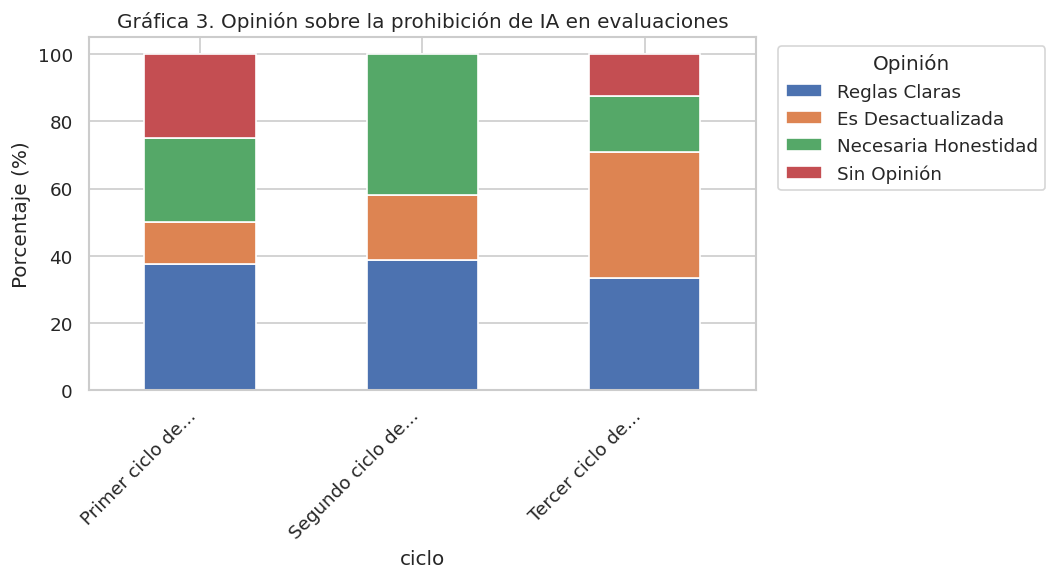

In [ ]:
cros = pd.crosstab(df['ciclo'], df['opinion_prohibicion'])
cros_pct = cros.div(cros.sum(axis=1), axis=0) * 100

# Shorten column names for display
col_map_short = {
    'Debería permitirse con reglas claras': 'Reglas Claras',
    'Es desactualizada, la IA ya forma parte del trabajo real de un ingeniero': 'Es Desactualizada',
    'Es necesaria para garantizar la honestidad académica': 'Necesaria Honestidad',
    'No tengo opinión formada': 'Sin Opinión'
}
cros_pct_short = cros_pct.rename(columns=col_map_short)

display(cros_pct_short.round(1))
ax = cros_pct_short.plot(kind='bar', stacked=True, figsize=(9,5))
plt.ylabel('Porcentaje (%)')
plt.title('Gráfica 3. Opinión sobre la prohibición de IA en evaluaciones')
plt.legend(title='Opinión', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(ticks=range(len(cros_pct.index)), labels=[shorten(label, width=20, placeholder='...') for label in cros_pct.index], rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/grafica3_opinion_prohibicion_por_ciclo.png')
plt.show()

# Tabla 2 — Indicadores por ciclo

In [ ]:
def contains_dependencia(text):
    if pd.isna(text):
        return False
    t = str(text).lower()
    keys = ['depend', 'dependen', 'dependencia', 'dependiente']
    return any(k in t for k in keys)

ciclos = [
    'Primer ciclo de formación (1-3 cuatrimestre)',
    'Segundo ciclo de formación (4-6 cuatrimestre)',
    'Tercer ciclo de formación (7-9 cuatrimestre)'
]

rows = []
for ciclo in ciclos:
    sub = df[df['ciclo'] == ciclo]
    revisa_cond = sub['percepcion_plagio'].str.contains('No, si se entiende y se adapta', na=False)
    revisa_pct = 100 * revisa_cond.sum() / sub.shape[0] if sub.shape[0]>0 else np.nan
    prod_cond = sub['mas_productivo'].isin(['Sí, un poco más', 'Sí, mucho más'])
    prod_pct = 100 * prod_cond.sum() / sub.shape[0] if sub.shape[0]>0 else np.nan
    dep_cond = sub['experiencias_abiertas'].apply(contains_dependencia)
    dep_pct = 100 * dep_cond.sum() / sub.shape[0] if sub.shape[0]>0 else np.nan
    rows.append({
        'Ciclo': ciclo,
        'Revisa y ajusta IA (%)': round(revisa_pct,1),
        'Se siente más productivo (%)': round(prod_pct,1),
        'Admite dependencia (%)': round(dep_pct,1),
        'N': sub.shape[0]
    })

tabla2 = pd.DataFrame(rows).set_index('Ciclo')
display(tabla2)
tabla2.to_csv('/content/tabla2_por_ciclo.csv')

,Revisa y ajusta IA (%),Se siente más productivo (%),Admite dependencia (%),N
Ciclo,,,,
Primer ciclo de formación (1-3 cuatrimestre),50.0,75.0,0.0,8
Segundo ciclo de formación (4-6 cuatrimestre),80.6,77.4,6.5,31
Tercer ciclo de formación (7-9 cuatrimestre),66.7,95.8,8.3,24


## Análisis cualitativo simple

In [ ]:
open_q = 'experiencias_abiertas'
if open_q in df.columns:
    muestras = df[open_q].dropna().sample(min(12, df[open_q].dropna().shape[0]), random_state=1)
    for i, r in enumerate(muestras, 1):
        print(f'{i}.', shorten(str(r), width=220, placeholder='...'))
keywords = ['depend', 'ayud', 'aprender', 'plagio', 'ética', 'docent', 'profesor', 'evalu', 'examen', 'copi']
kw_counts = {k: df.apply(lambda row: row.astype(str).str.lower().str.contains(k).any(), axis=1).sum() for k in keywords}
kw_df = pd.DataFrame.from_dict(kw_counts, orient='index', columns=['recuento']).sort_values('recuento', ascending=False)
display(kw_df)

1. entiendo que el uso de la ia puede afectar a nuestro desarrollo y es útil pedir modificaciones o explicaciones de nuestra parte sobre nuestro trabajo, demostrando que el uso de la ia fue con responsabilidad, y no...
2. Que los permitiera utilizar la IA para algunas actividades o investigaciones
3. El prohibir su uso es indispensable ya que la mayoría de las veces no se lee el contenido pero también dar oportunidad a utilizarla de manera adecuada para un aprendizaje autónomo
4. Con lo que esta declarado por la universidad, estoy de acuerdo
5. Explicar y ayudar a su uso de manera correcta
6. Enseñar formas de usar la ia para aprender de una manera más rápida
7. Que digan de que manera se puede usar correctamente sin que afecte
8. Pues que siga de la misma manera, siento que las cosas son de cada quien, dependiendo de la honestidad de las personas y como se desenvuelven en el ámbito y a que aspiran.
9. Esta bien que se permitiera, siempre y cuando el alumnado sepa explicar lo que escri

,recuento
plagio,47
copi,30
ayud,25
depend,22
aprender,9
profesor,5
examen,3
docent,1
ética,0
evalu,0
